**Nama : Rafa Fadil Aras**

**Kelas : TI-3G**

**NIM : 2341720007**

## **Praktikum 5 - Klasifikasi Citra Siang dan Malam**

### **Langkah 0 - Import Library**

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = "/content/drive/MyDrive/Machine Learning/JS11/images/images/training"
test_dir = "/content/drive/MyDrive/Machine Learning/JS11/images/images/test"

### **Langkah 1 - Load Data dan Visualisasikan**

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if not img is None:
                img_list.append((img, label))
    return img_list

In [ ]:
train_img = load_dataset(train_dir)

In [ ]:
train_img[0]

(array([[[97, 54, 71],
         [59, 16, 33],
         [94, 51, 70],
         ...,
         [71, 51, 76],
         [62, 43, 71],
         [43, 27, 54]],
 
        [[85, 42, 59],
         [42,  0, 16],
         [83, 40, 57],
         ...,
         [32,  9, 38],
         [24,  5, 35],
         [43, 27, 56]],
 
        [[38,  0, 11],
         [94, 53, 67],
         [73, 32, 46],
         ...,
         [41, 15, 52],
         [50, 28, 66],
         [46, 26, 63]],
 
        ...,
 
        [[34,  3, 21],
         [31,  0, 15],
         [38,  6, 17],
         ...,
         [37,  9,  5],
         [43, 15, 11],
         [37,  9,  5]],
 
        [[56, 27, 32],
         [37,  8, 10],
         [44, 14, 12],
         ...,
         [37,  8,  0],
         [54, 25, 17],
         [26,  0,  0]],
 
        [[62, 38, 28],
         [47, 23, 11],
         [67, 41, 26],
         ...,
         [56, 27, 13],
         [76, 47, 33],
         [39, 11,  0]]], dtype=uint8),
 'night')

In [ ]:
pick_random = np.random.randint(0, len(train_img))
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 17
(700, 1280, 3)


In [ ]:
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))
    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'
    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (737, 1024, 3)
Label	: day


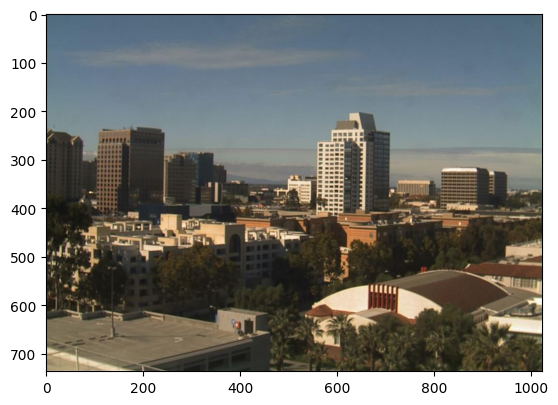

In [ ]:
random_img_viz(train_img)

### **Langkah 3 - Pra Pengolahan Data**

In [ ]:
def standarized_input(image):
    std_img = cv2.resize(image, (1100,600))
    return std_img

In [ ]:
def label_encoder(label):
    num_val = 0
    if(label == 'day'):
        num_val = 1
    return num_val

In [ ]:
def preprocess(img_list):
    std_img_list = []
    for item in img_list:
        image = item[0]
        label = item[1]
        std_img = standarized_input(image)
        img_label = label_encoder(label)
        std_img_list.append((std_img, img_label))
    return std_img_list

In [ ]:
train_std_img_list = preprocess(train_img)

In [ ]:
pick_random = np.random.randint(0, len(train_std_img_list))
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 55
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


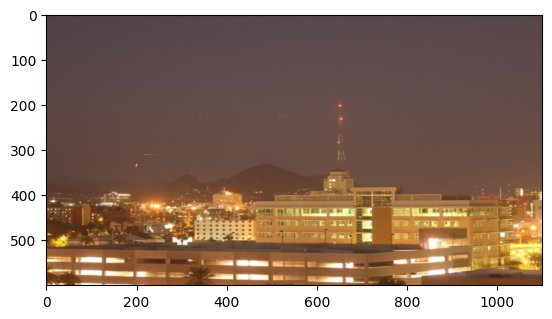

In [ ]:
random_img_viz(train_std_img_list)

### **Langkah 4 - Ekstraksi Fitur**

In [ ]:
def avg_brightness(image):
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(img_hsv[:,:,2])
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area
    return avg

Image 215
Avg Brighness: 131.7712


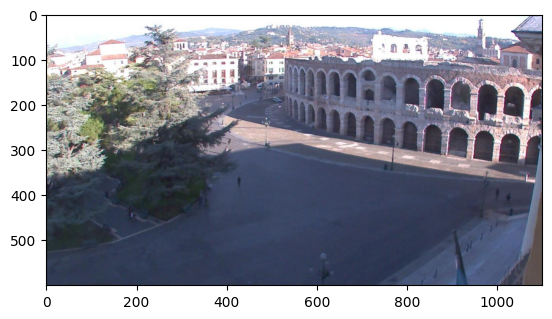

In [ ]:
rand_img = np.random.randint(0, len(train_std_img_list))
feature_img = train_std_img_list[rand_img][0]
avg_img = avg_brightness(feature_img)
print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

### **Langkah 5 - Klasifikasi dengan Metode Threshold**

In [ ]:
def predict_label(img, threshold):
    avg = avg_brightness(img)
    pred = 0
    if avg > threshold:
        pred = 1
    return pred

Image 164
Actual label: 1
Predicted label: 0


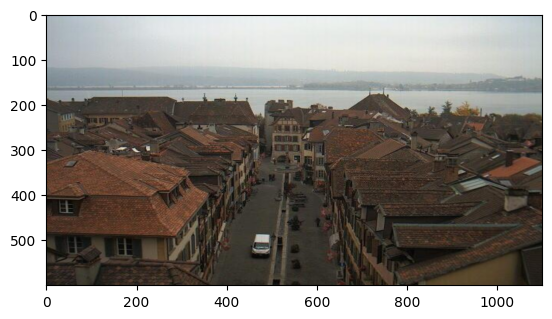

In [ ]:
rand_img = np.random.randint(0, len(train_std_img_list))
pred = predict_label(train_std_img_list[rand_img][0], threshold=120)
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

### **Langkah 6 - Evaluasi Manual**

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []
    for file in img_list:
        img = file[0]
        label = file[1]
        pred_label = predict_label(img, threshold)
        if pred_label != label:
            miss_labels.append((img, pred_label, label))
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img
    print(f'Accuracy: {accuracy:.4f}')

In [ ]:
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [ ]:
test_img = load_dataset(test_dir)
test_std_img_list = preprocess(test_img)
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


### **Klasifikasi dengan SVM**
### **Langkah 4 Alternatif - Membuat Feature Vectors.**

In [ ]:
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []
    for img in img_list:
        img_avg = avg_brightness(img[0])
        img_label = img[1]
        avg_list.append(img_avg)
        labels.append(img_label)
    data = np.column_stack((avg_list, labels))
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])
    return df

In [ ]:
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,101.579750,0.0
1,98.714723,0.0
2,24.730023,0.0
3,99.077967,0.0
4,39.326377,0.0


In [ ]:
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,132.243377,1.0
1,129.938794,1.0
2,188.119652,1.0
3,127.443791,1.0
4,98.868853,1.0


### **Langkah 5 - Buat Model SVM**

In [ ]:
from sklearn.svm import SVC
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]
model = SVC()
model.fit(X_train, y_train)

SVC()

### **Langkah 6 - Evaluasi**

In [ ]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
y_test_pred = model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9
